In [1]:
from pyforest import *
import warnings
warnings.filterwarnings('ignore')


In [2]:
#lazy_imports()
active_imports()

import seaborn as sns


['import seaborn as sns']

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/RanjitM007/DSData/master/MNC_Salaries.csv')

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [5]:
#shape
df.shape

(457, 9)

In [6]:
#lazy_imports()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


In [8]:
#count null values
df.isnull().sum()

Name         0
Team         0
Number       0
Position     0
Age          0
DOJ          0
Weight       0
College     84
Salary      11
dtype: int64

In [9]:
#lets look for the nan values
df.isnull().values.any()

True

<IPython.core.display.Javascript object>

<Axes: >

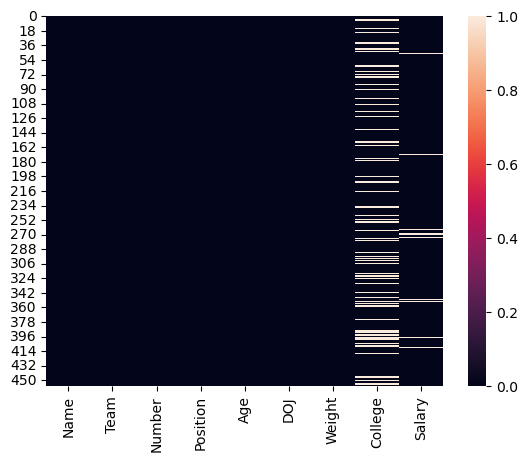

In [10]:
#we can see from the above result that we don't have any kind of null values  in our data set
#lets confirm with the heatmap
sns.heatmap(df.isnull())


In [11]:
df.dtypes

Name         object
Team         object
Number        int64
Position     object
Age           int64
DOJ          object
Weight        int64
College      object
Salary      float64
dtype: object

In [12]:
#fill all nan value of college with the mode of college
df['College']=df['College'].fillna(df['College'].mode().iloc[0])
#fill nan value of salary with its mean
df['Salary']=df['Salary'].fillna(df['Salary'].mean())

In [13]:
#sns.set_style("whitegrid")
sns.set_style("dark")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

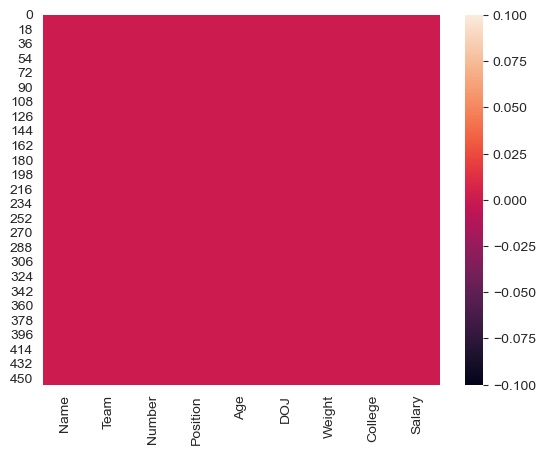

In [14]:
#check null value using heatmap
sns.heatmap(df.isnull())

observation :- Here we saw that there is no null value in the dataset 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

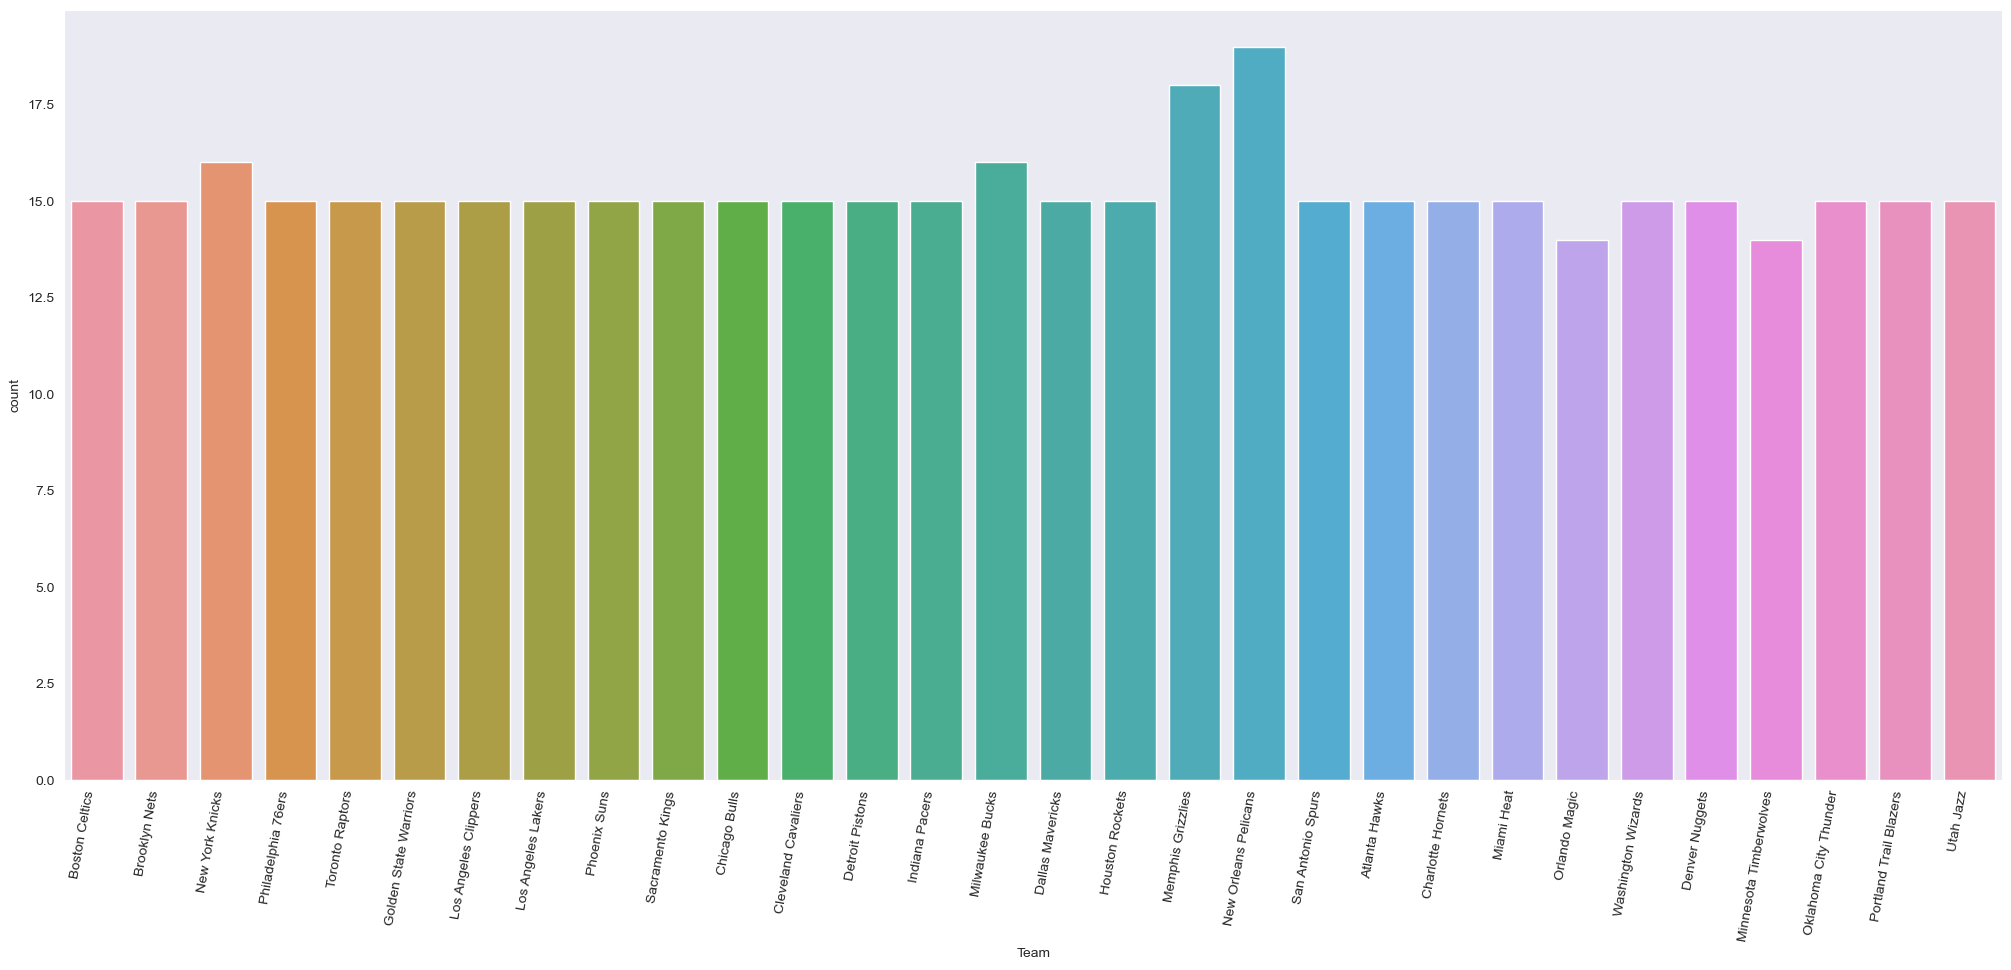

In [15]:
plt.figure(figsize=[25,10])  #the size of output plot figure 
ax=sns.countplot(data=df,x='Team')  #countplot of team column to find the count no.of each teams
ax.set_xticklabels(ax.get_xticklabels(), rotation=80, ha='right')  #rotate the x-axis labels (team names) 80 degree towards right
plt.show()

In [16]:
df.Team.value_counts()  #count no.of each team present in the Team column

New Orleans Pelicans      19
Memphis Grizzlies         18
New York Knicks           16
Milwaukee Bucks           16
Boston Celtics            15
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Dallas Mavericks          15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Utah Jazz                 15
Orlando Magic             14
Minnesota Timberwolves    14
Name: Team, dtype: int64

In [17]:
df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,Kentucky,5.000000e+06


In [18]:
df.Position.value_counts() #count the no.of each value in Position

SG    102
PF    100
PG     92
SF     85
C      78
Name: Position, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

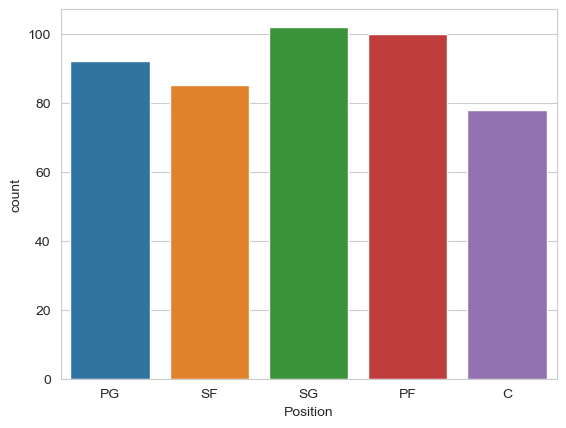

In [19]:
sns.set_style("whitegrid") # white background with grid lines
sns.countplot(data=df,x='Position') #plot a graph to find the count no.of each Position
plt.show()

In above  i found that no.of SG and PF positon are more than 100 where as no.of PG and SF position are between 100 to 80 and no.of C position are less than 80

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

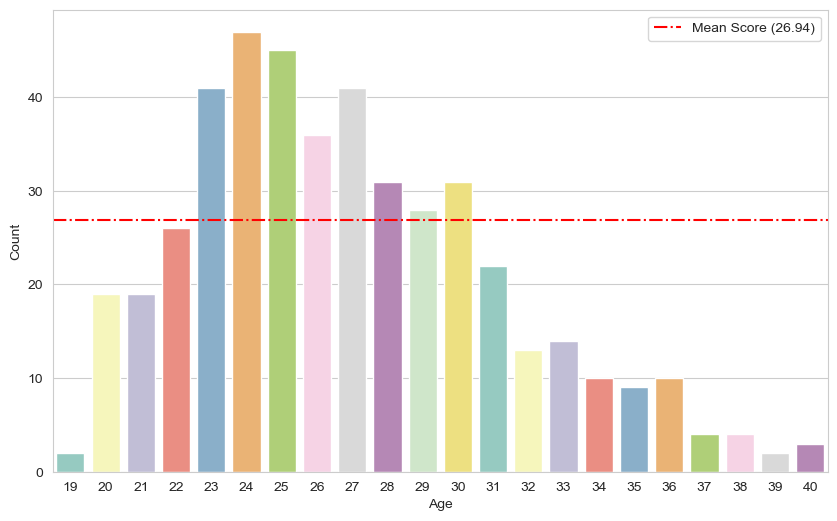

In [20]:
plt.figure(figsize=[10, 6]) # size of figure 

# Create a countplot
sns.countplot(data=df, x='Age', palette='Set3')

# Calculate and plot the mean value as a horizontal line
mean_score = df['Age'].mean()
plt.axhline(y=mean_score, color='r', linestyle='-.', label=f'Mean Score ({mean_score:.2f})')

# Add labels and legend
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

In above plot we can find the mean of Age by the red horizontal line

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

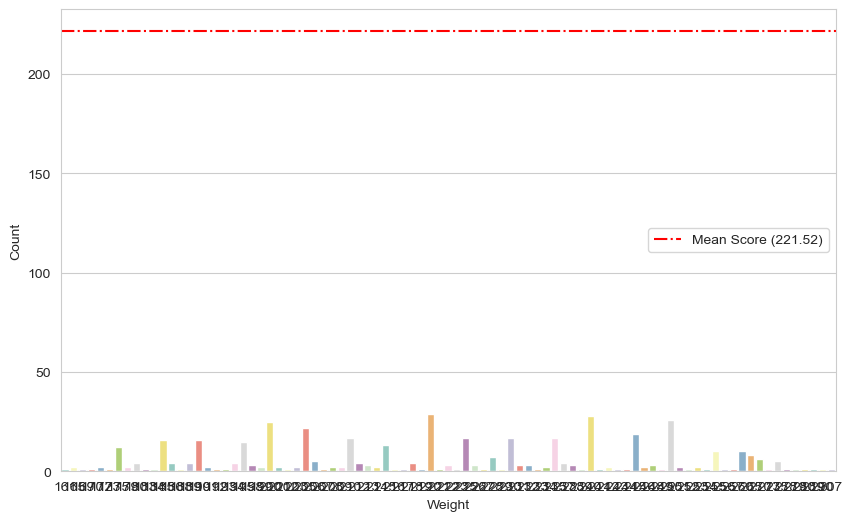

In [21]:
plt.figure(figsize=[10, 6])

# Create a countplot
sns.countplot(data=df, x='Weight', palette='Set3')

# Calculate and plot the mean value as a horizontal line
mean_score = df['Weight'].mean()
plt.axhline(y=mean_score, color='r', linestyle='-.', label=f'Mean Score ({mean_score:.2f})')

# Add labels and legend
plt.xlabel('Weight')
plt.ylabel('Count')
plt.legend()

# Show the plot
plt.show()

here also the red horizontal line indicates the mean of Weight

In [22]:
#correlation wit target table
def corr_with_target(df):
    df_train=df.copy()
    Target="Salary"#Y label
    plt.figure(figsize=[12,6])
    #drop target table from dataframe and plot bar chart to find correlation with target table
    df_train.drop(Target,axis=1).corrwith(df[Target]).plot(kind='bar',grid=True,color='red')
    plt.xticks(rotation=90)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

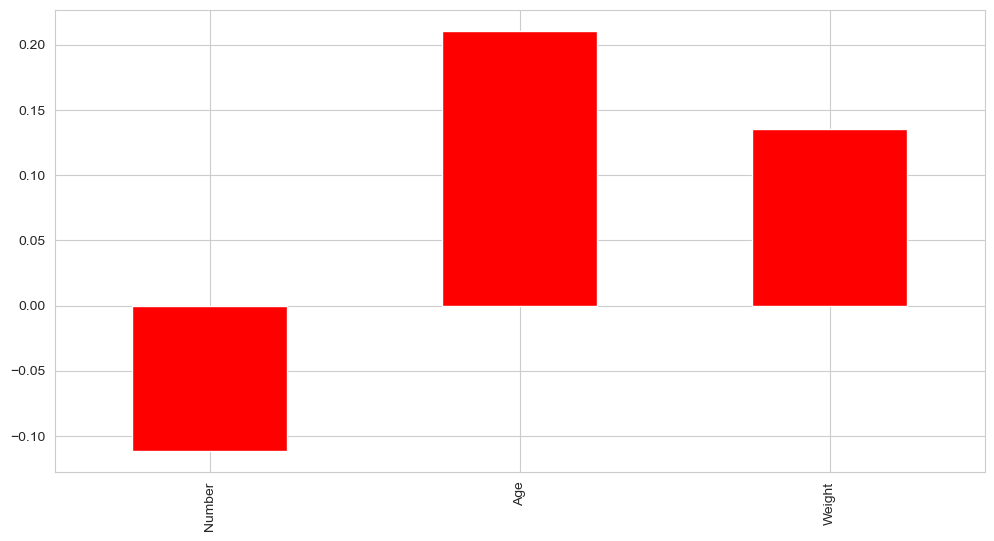

In [23]:
corr_with_target(df)

in above no correlaiton between target table and Number but age and Weight are correlated

# Bai variant analysis

In [24]:
df.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7.730337e+06
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6.796117e+06
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,4.842684e+06
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1.148640e+06
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,Kentucky,5.000000e+06


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Position', ylabel='Salary'>

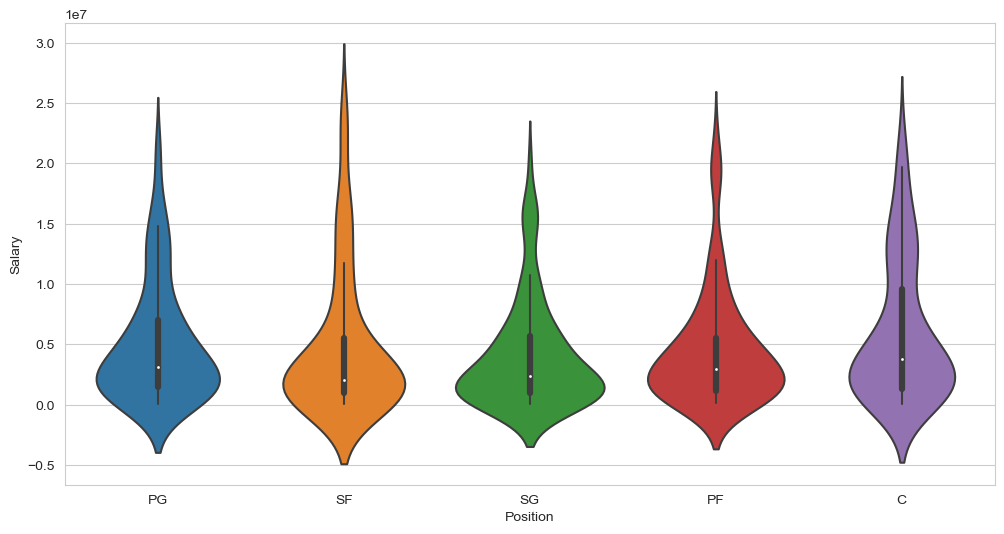

In [25]:
plt.figure(figsize=[12,6])
sns.violinplot(data=df,x='Position',y='Salary')

In above plot we observe that no of SG postion is more and C position is less compared to  other position
and in SF position the most high paid and also lowest paid person are there.

<IPython.core.display.Javascript object>

<Axes: xlabel='Position', ylabel='Salary'>

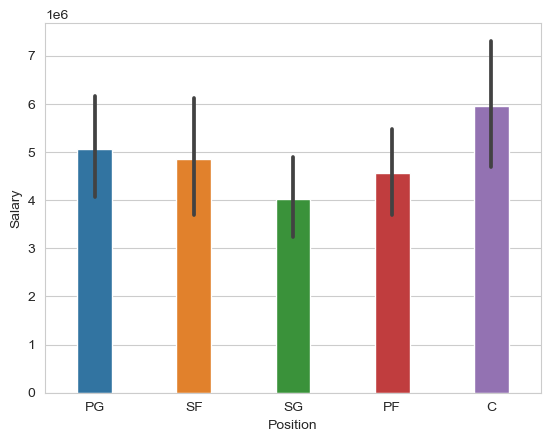

In [26]:
sns.barplot(data=df,x='Position',y='Salary',width=0.35)

<IPython.core.display.Javascript object>

<Axes: xlabel='Position', ylabel='Salary'>

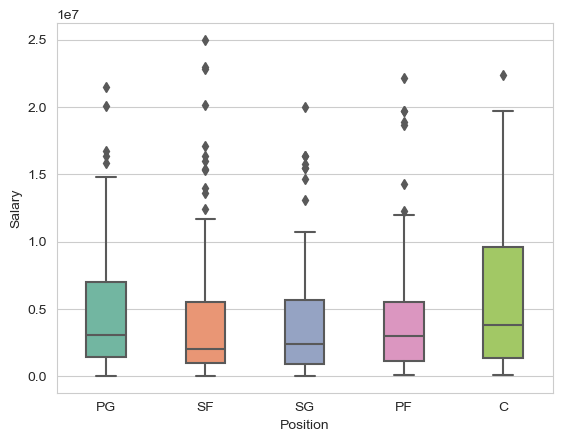

In [27]:
sns.boxplot(data=df,x='Position',y='Salary',width=0.4,palette='Set2',)

In above plot we find some outliers are there in every Position and there is more outliers in SF position and lower outliers in C position

<Axes: >

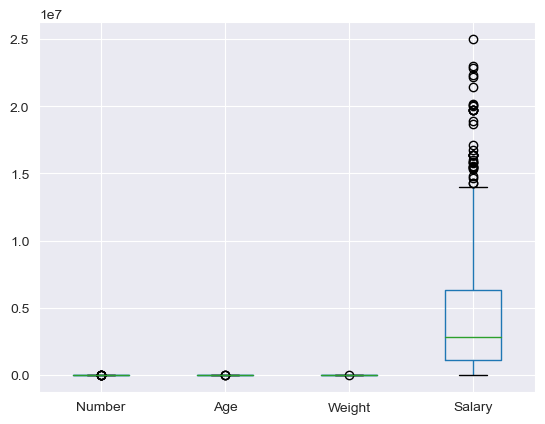

In [71]:
df.boxplot()

In the above in Salary we can see more no.of outliers are there 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1500x800 with 0 Axes>

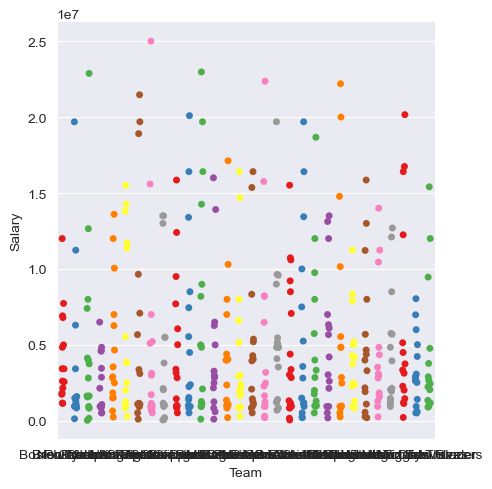

In [68]:
plt.figure(figsize=[15,8])
sns.catplot(data=df,x='Team',y='Salary',height=5,palette='Set1')

in above plot the most of the team have there salary between the Salary range of 0 to 0.5  .

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

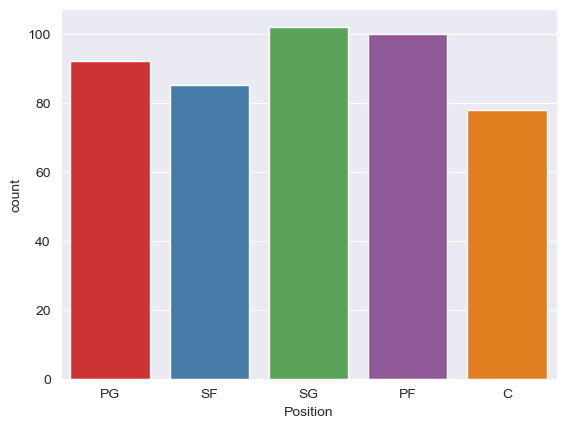

In [63]:
sns.set_style('darkgrid')
sns.countplot(data=df,x='Position',palette='Set1')
plt.show()

from above plot we can find the no of Position.SG and PF postion are equal or more than 100 and others are less than 100

<IPython.core.display.Javascript object>

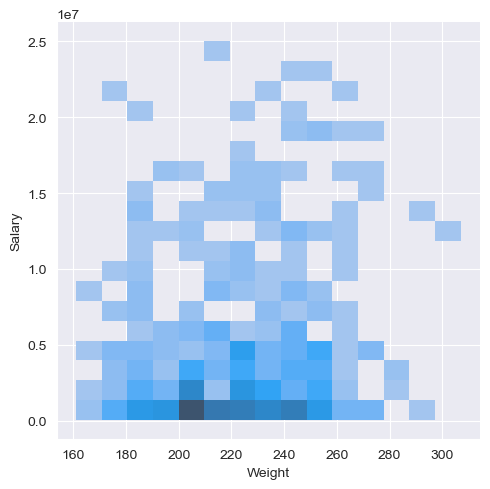

In [65]:
sns.displot(data=df,x='Weight',y='Salary',palette="Set3")

<IPython.core.display.Javascript object>

<Axes: xlabel='Weight', ylabel='Proportion'>

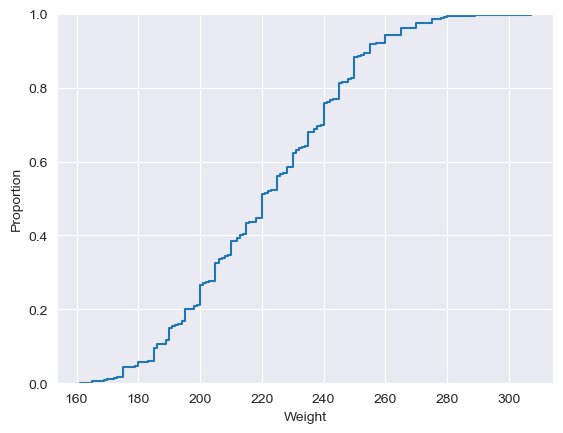

In [70]:
 sns.ecdfplot(data=df,x='Weight')

<IPython.core.display.Javascript object>

<Axes: xlabel='Position', ylabel='Count'>

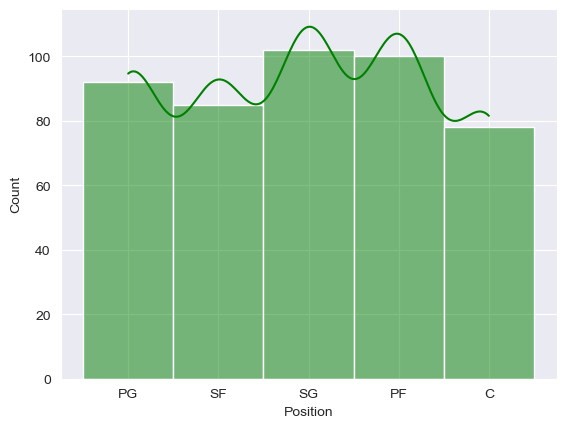

In [33]:
sns.histplot(data=df,x='Position',color='g',kde=True)


<IPython.core.display.Javascript object>

<Axes: xlabel='Position', ylabel='Salary'>

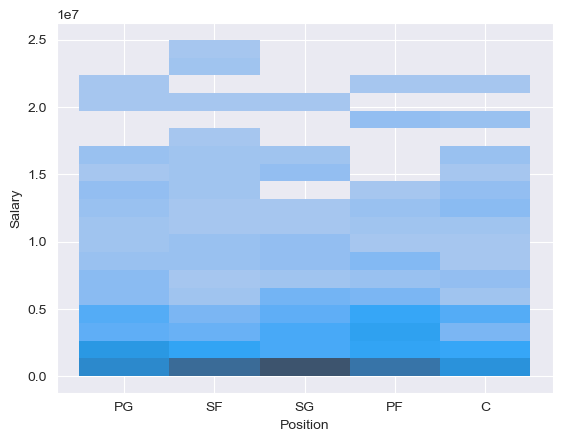

In [34]:
sns.histplot(data=df,x='Position',y='Salary')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1200x600 with 0 Axes>

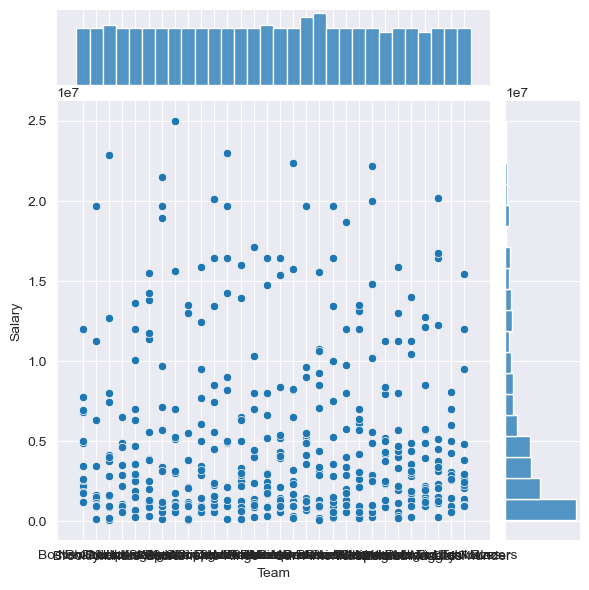

In [35]:
plt.figure(figsize=[12,6])
sns.jointplot(data=df,x='Team',y='Salary',kind='scatter')

here we can see that all the Teams have there avg salary between 0 to 1 salary range

<IPython.core.display.Javascript object>

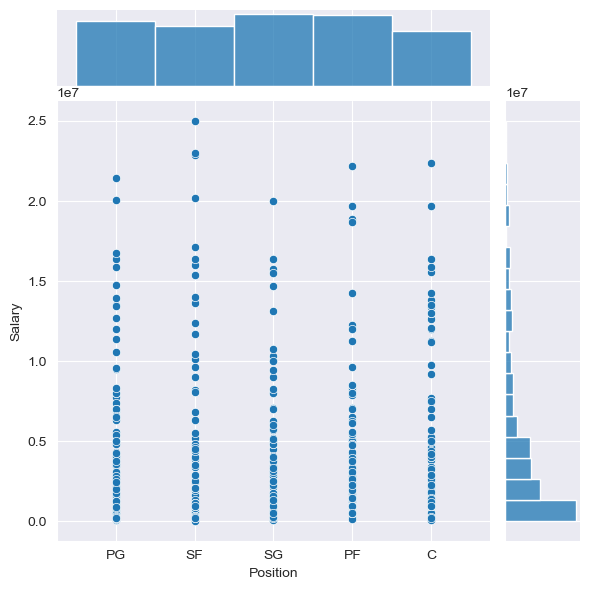

In [36]:
sns.jointplot(data=df,x='Position',y='Salary',kind='scatter')

here also we found the workers of all Position have there avg Salary between 0 to 1 salary range

<IPython.core.display.Javascript object>

<Axes: xlabel='Weight', ylabel='Salary'>

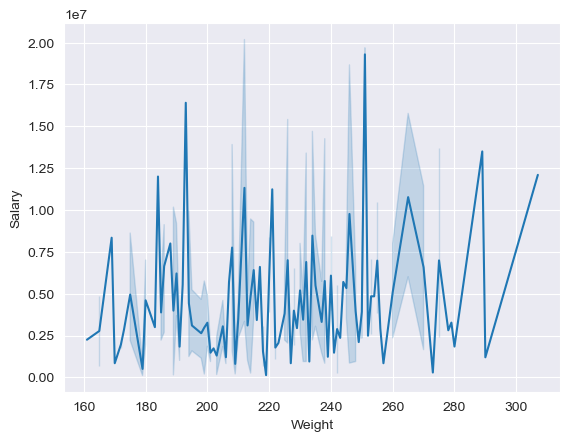

In [37]:
sns.lineplot(data=df,x='Weight',y='Salary',palette='Set3')

from the above lineplot we can observ that all the wieghted workers have there avg Salary between 0 to 1 salary range
and also u can see the most of salaroid workers are between 180 to 260 weight range

<IPython.core.display.Javascript object>

<Axes: xlabel='Position', ylabel='Salary'>

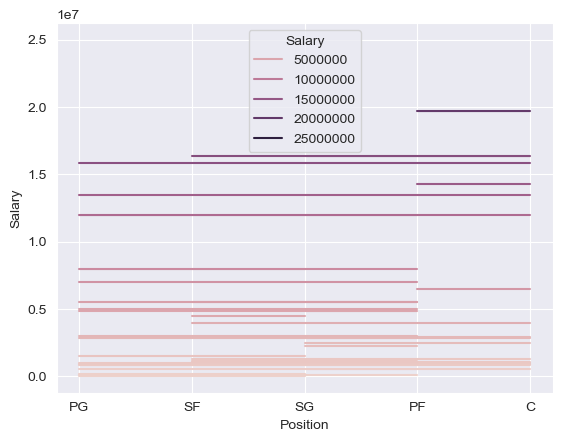

In [74]:
sns.lineplot(data=df,x='Position',y='Salary',hue="Salary",color='g')

In above we can observ the salary of all position between 0 to 1 salary range we can observ these by seeing
color palette of Salary and the highest salary is nearly salary range 2.0 as from color palette

<IPython.core.display.Javascript object>

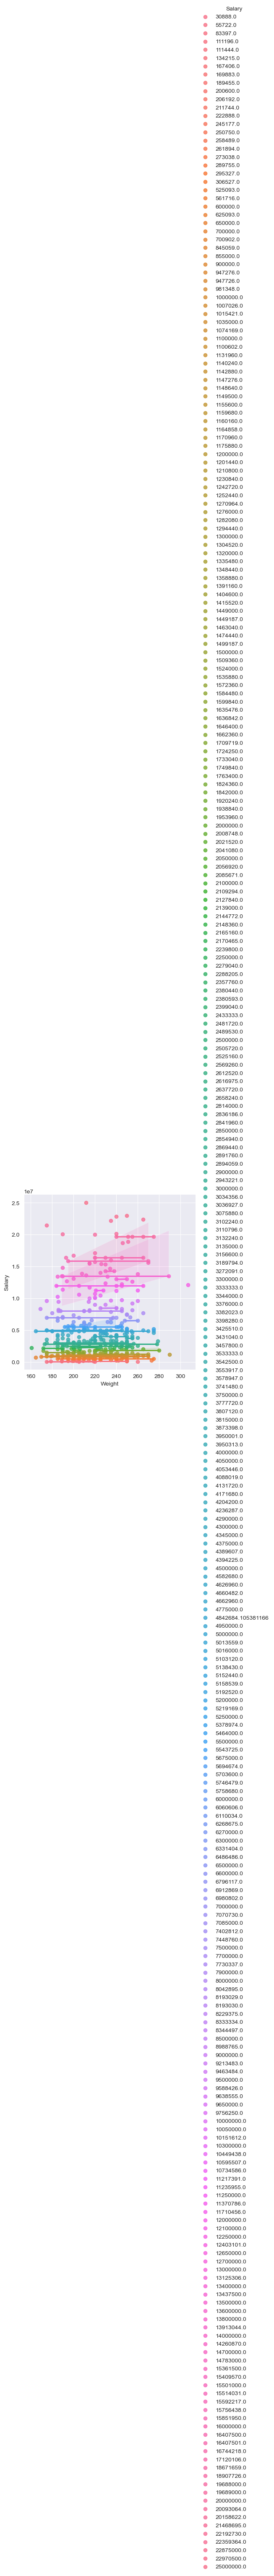

In [79]:
sns.lmplot(data=df,x='Weight',y='Salary',hue="Salary")

we can see the avg salary for workers is range between 0 to 0.5 and 
the mostly workers are from weight range of 180 to 260

<IPython.core.display.Javascript object>

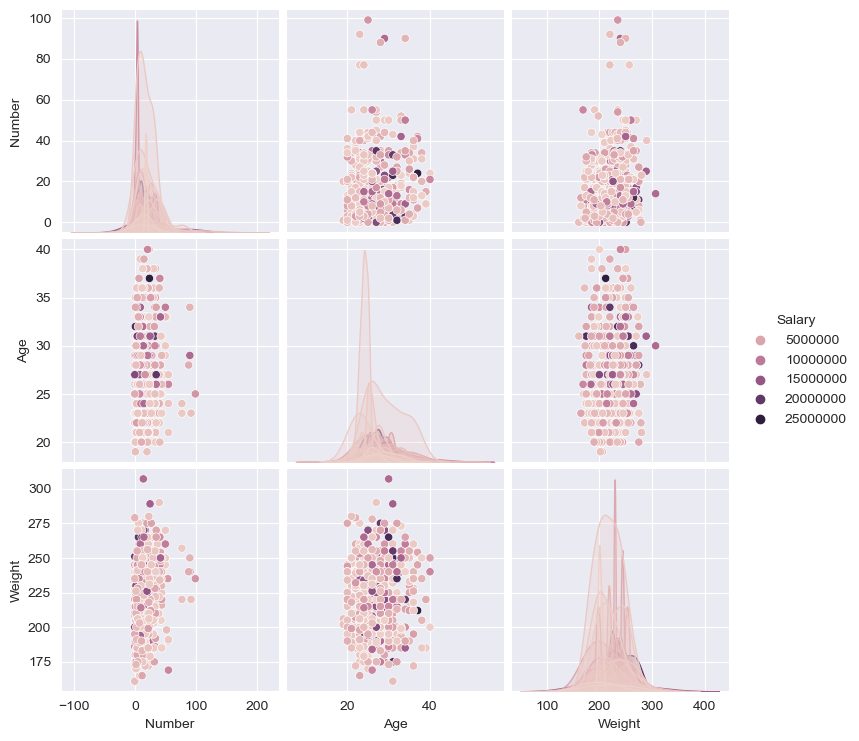

In [42]:
sns.pairplot(data=df,hue='Salary')

from the above plot we can see the distribution of  amount of salary in different comparision as between number and age 
most of salaroid workers are from number range of 0 to 60 and Age range of 20 to 40 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

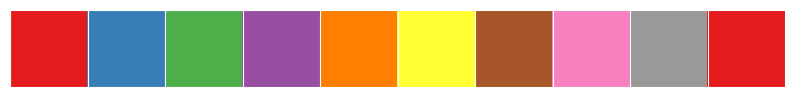

In [43]:
pal=sns.color_palette('Set1',10)
sns.palplot(pal)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Weight', ylabel='Salary'>

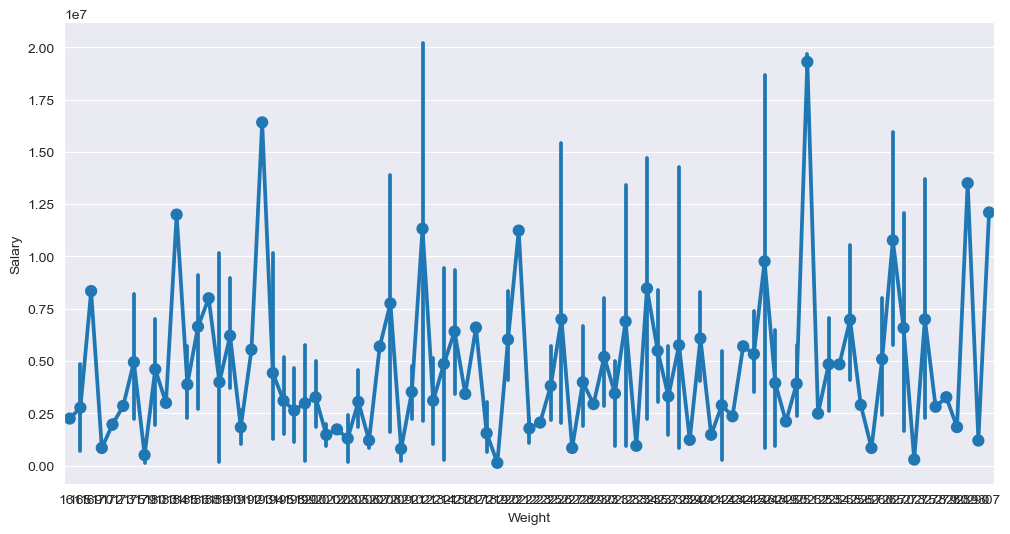

In [44]:
plt.figure(figsize=[12,6])
sns.pointplot(data=df,x='Weight',y='Salary')


In above plot we can see the avg no of workers of weight are in between salary range 0 to 1

<IPython.core.display.Javascript object>

<Axes: xlabel='Weight', ylabel='Salary'>

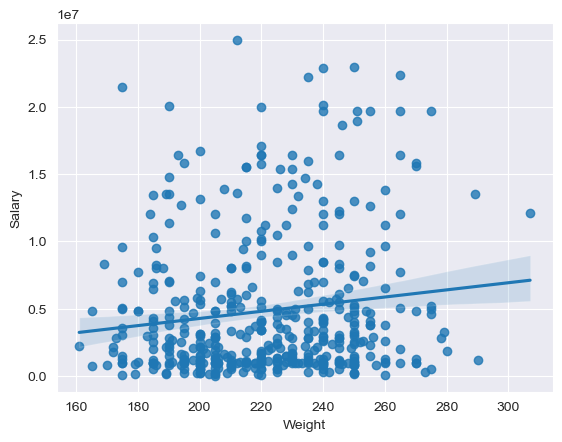

In [45]:
sns.regplot(data=df,x='Weight',y='Salary')

<IPython.core.display.Javascript object>

<Axes: xlabel='Age', ylabel='Salary'>

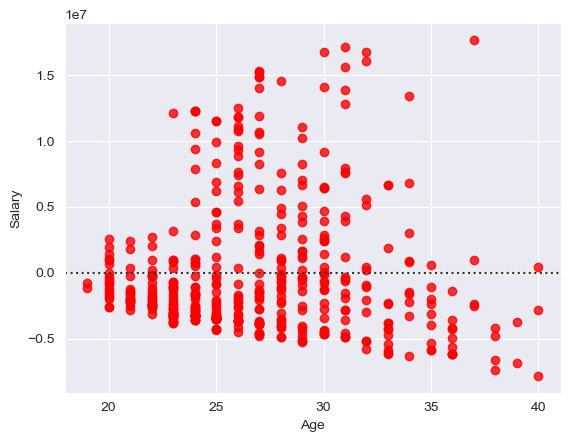

In [46]:
sns.residplot(data=df,x='Age',y='Salary',color='r')

<IPython.core.display.Javascript object>

<Axes: xlabel='Weight', ylabel='Salary'>

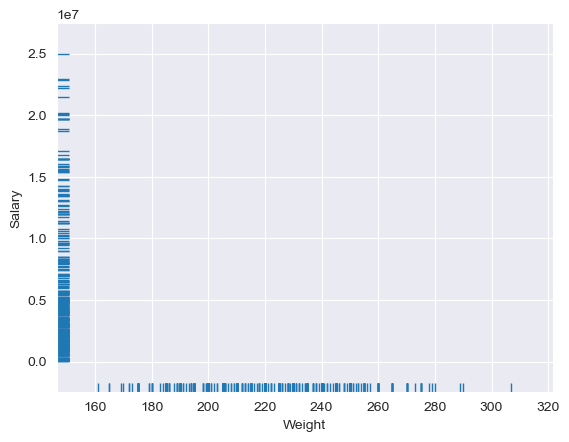

In [47]:
sns.rugplot(data=df,x='Weight',y='Salary')

Here we can see the avg workers have salary between range of 0 to 1 and avg weight between range of 180 to 260 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Team', ylabel='Salary'>

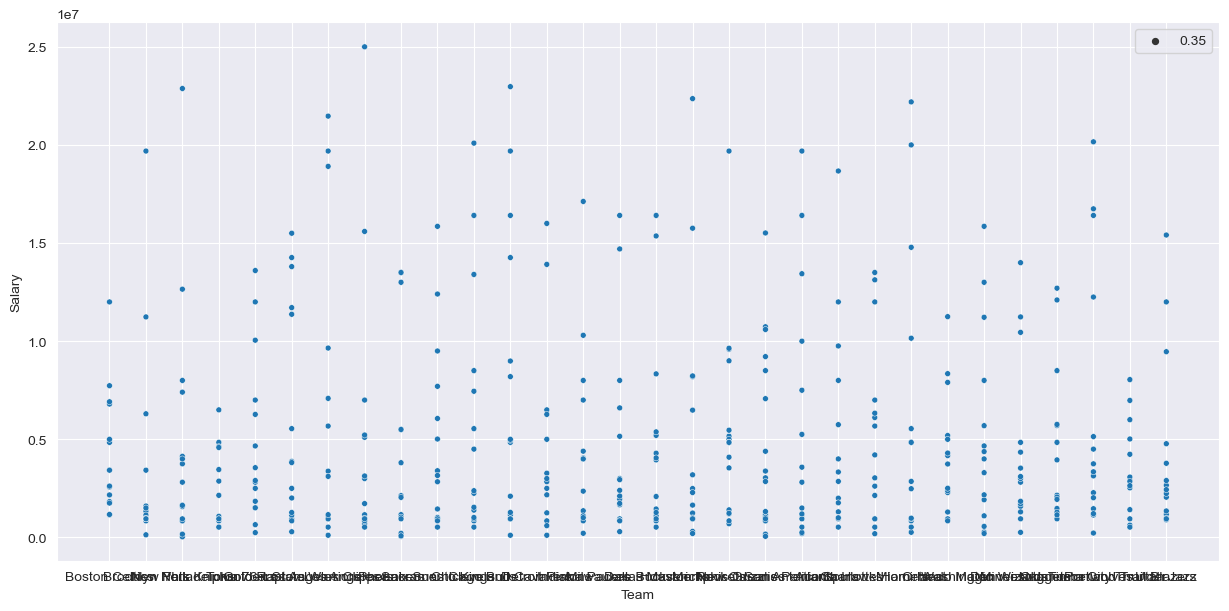

In [48]:
plt.figure(figsize=[15,7])
sns.scatterplot(data=df,x='Team',y='Salary',palette='Set1',size=0.35)

<IPython.core.display.Javascript object>

<Axes: xlabel='Position', ylabel='Salary'>

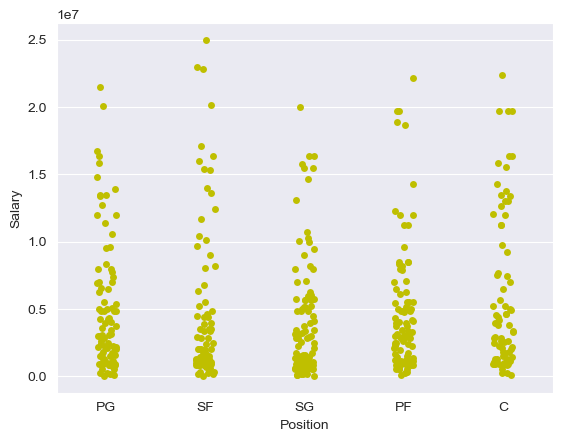

In [49]:
sns.stripplot(data=df,x='Position',y='Salary',color='y')

Here we observ all the Poation have avg salary between range of 0 to 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Team', ylabel='Salary'>

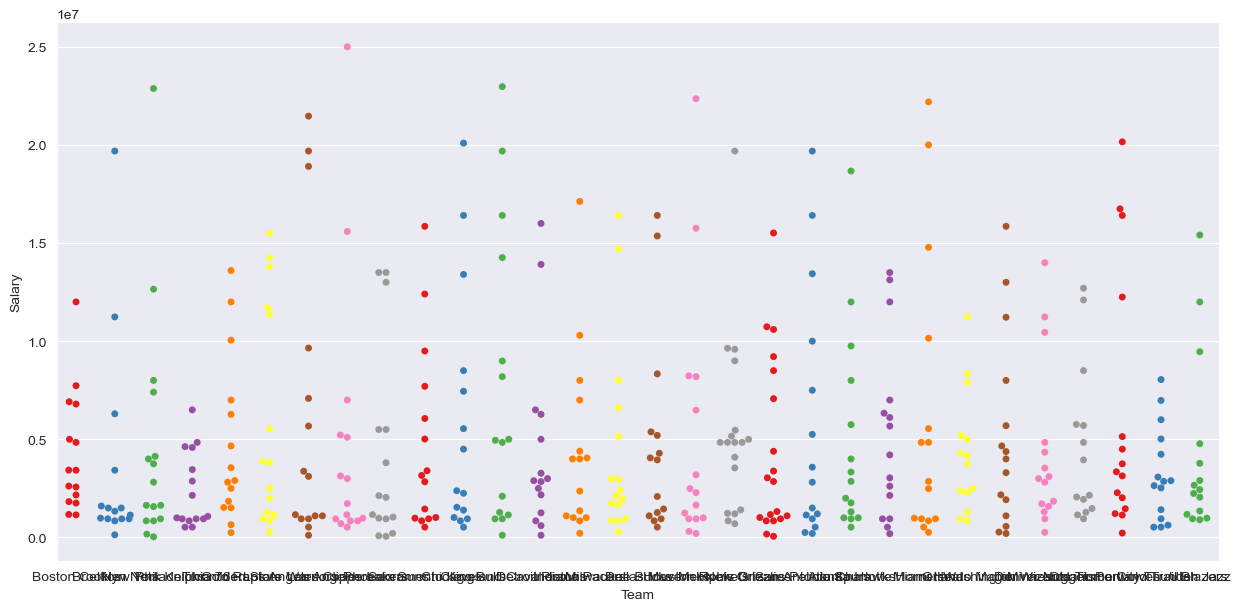

In [50]:
plt.figure(figsize=[15,7])
sns.swarmplot(data=df,x='Team',y='Salary',palette='Set1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Team', ylabel='Salary'>

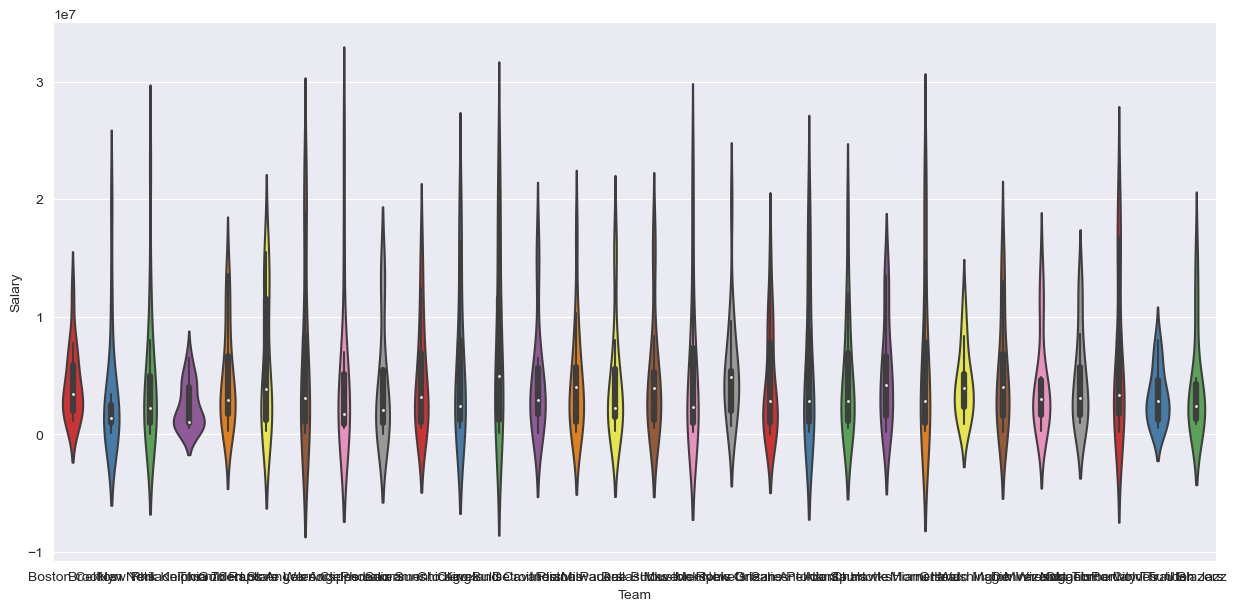

In [51]:
plt.figure(figsize=[15,7])
sns.violinplot(data=df,x='Team',y='Salary',palette='Set1')